In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
%cd /content/drive/MyDrive/
# !ls

/content/drive/MyDrive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from pandas.api.types import CategoricalDtype
from sklearn import preprocessing

### Opis problema
Jedan od najvećih problema u današnjoj košarci, kao i u bilo kojem sportu je kako uklopiti pojedinca u tim. Iako tradicionalne uloge u košarci (plejmejker, centar) nisu više toliko relevantne, usled činjenice da igrači sve više preuzimaju raznovrsne pozicije i uloge u timu, pa je samim tim klasifikacija znatno otežana, a broj pozicija zapravo povećan, u ovom projektu ću pokušati da napravim model koji će predviđati poziciju igrača prema konvencionalnim ulogama:

1 - PG (Point Guard)
2 - SG (Shooting Guard)
3 - SF (Small Forward)
4 - PF (Power Forward)
5 - C (Center)

Korišćeni dataset https://data.world/jgrosz99/nba-player-data-1978-2016#

In [53]:
data = pd.read_csv('NBA_Season_Data.csv')

# data.head()
# data.tail()
data.iloc[0:50,:]

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,8.0,25.8,17.0,6.8,0.9,1.1,13.5,23.3,NaN,1.5,5.0,6.5,0.086,NaN,-1.4,0.2,-1.2,0.7,0.020,0.066,20.2,robintr01,-1.61,19780,82,0.0,0.505,331339,0.512,-1.73,...,1.5,0.1,0.4,-1.6,0.9,44.4,42.3,-1.3,-1.2,0.6,0.6,-1.5,-1.4,0.2,0.2,0.1,0.1,0.4,0.4,"$3,900,000","$3,900,000",3.2,0.7,0.60,1.6,"$8,800,000",0.4,"$2,900,000",1.6,0.6,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,3.6,6.4,5.0,22.2,2.4,0.2,12.8,26.8,NaN,6.1,1.7,7.9,0.114,NaN,2.8,-1.2,1.6,3.0,0.089,0.025,23.4,smithra01,-3.25,19805,82,0.0,0.518,332955,0.517,0.52,...,1.5,-1.1,-0.8,4.4,0.8,40.4,38.5,1.8,1.5,3.1,3.1,3.1,2.6,4.0,4.0,-1.3,-1.1,-0.8,-0.8,"$16,200,000","$16,200,000",2.1,1.9,0.73,2.8,"$14,800,000",2.7,"$14,200,000",8.5,10.8,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,10.2,22.7,16.4,6.5,1.3,2.4,12.3,21.6,NaN,3.5,4.8,8.3,0.123,NaN,0.1,1.2,1.3,2.7,0.052,0.071,18.9,hayesel01,0.70,19830,82,0.0,0.506,336086,0.510,-1.31,...,1.5,1.0,1.3,-1.2,0.8,40.1,38.2,1.3,1.1,2.7,2.8,0.1,0.1,1.5,1.5,1.3,1.0,1.3,1.3,"$14,200,000","$14,400,000",2.6,1.9,0.73,2.8,"$14,700,000",2.4,"$12,700,000",7.4,3.9,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,8.0,25.6,17.0,15.7,1.4,1.1,13.9,18.8,NaN,6.1,4.8,10.8,0.162,NaN,1.8,2.1,4.0,4.8,0.091,0.071,16.2,cowenda01,-1.68,19830,82,0.0,0.505,332440,0.500,2.36,...,1.5,2.0,2.3,-0.6,0.8,41.8,39.7,4.4,3.6,5.2,5.5,1.9,1.5,2.9,3.1,2.5,2.0,2.3,2.4,"$26,100,000","$27,700,000",2.6,3.6,0.73,4.0,"$20,600,000",4.6,"$23,400,000",14.0,7.9,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,7.8,24.7,16.4,13.4,1.4,2.0,15.8,26.1,NaN,6.9,4.0,10.9,0.165,NaN,2.4,0.8,3.1,4.1,0.104,0.061,22.0,mcadobo01,-0.47,20005,82,0.0,0.528,333391,0.518,1.37,...,1.5,0.7,1.0,1.6,0.8,40.3,38.3,3.4,2.7,4.3,4.5,2.5,2.0,3.3,3.5,0.9,0.7,1.0,1.0,"$21,800,000","$22,600,000",2.5,3.0,0.73,3.6,"$18,500,000",3.9,"$19,900,000",11.6,9.0,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0
5,1978,NJN,Bernard King,21,79,3092,17.3,0.511,NaN,0.277,7.9,16.0,11.8,9.9,1.7,0.6,14.3,26.0,NaN,2.6,3.3,5.9,0.092,NaN,1.0,0.0,0.9,2.3,0.041,0.051,22.3,kingbe01,-4.89,19905,82,0.0,0.485,332793,0.478,-0.22,...,1.5,-0.1,0.1,1.3,0.8,39.1,37.3,1.0,0.8,2.3,2.4,1.2,0.9,2.2,2.3,-0.2,-0.1,0.1,0.1,"$12,200,000","$12,600,000",1.6,1.3,0.69,2.3,"$11,900,000",2.1,"$10,900,000",6.2,6.0,0.2,5.5,2.8,3.0,21.16,0.0,79.0,205.0,3.0,21.0
6,1978,CHI,Artis Gilmore,28,82,3067,23.5,0.604,NaN,0.531,11.3,26.6,19.0,14.0,0.6,3.2,19.1,25.3,NaN,7.8,3.7,11.5,0.180,NaN,3.2,1.0,4.2,4.8,0.122,0.058,20.5,gilmoar01,-0.79,19755,82,0.0,0.524,327657,0.505,2.58,...,1.5,0.9,1.2,2.1,0.8,37.4,35.7,4.6,3.5,5.1,5.1,3.3,2.6,3.9,3.9,1.2,0.9,1.2,1.2,"$25,600,000","$25,600,000",1.9,3.3,0.73,3.9,"$19,700,000",4.8,"$24,000,000",13.7,10.6,3.2,12.8,5.0,5.0,28.36,6.0,86.0,240.0,5.0,28.0
7,1978,DEN,David Thompson,23,80,3025,23.2,0.578,NaN,0.422,5.5,7.7,6.6,19.3,1.3,1.7,11.5,26.8,NaN,10.8,1.9,12.7,0.202,NaN,4.6,-1.4,3.2,4.0,0.172,0.030,23.7,thompda01,0.75,19830,82,0.0,0.531,329852,0.517,1.10,...,1.5,-1.1,-0.9,6.6,0.8,37.8,36.0,3.6,2.8,4.3,4.4,5.1,3.9,5.2,5.3,-1.5,-1.1,-0.9,-0.9,"$21,800,000","$22,400,000",2.2,3.0,0.73,3.6,"$18,500,000",4.1,"$20,800,000",11.6,14.1,-2.4,11.1,1.6,2.0,23.56,2.0,76.0,195.0,2.0,24.

In [54]:
data.columns.unique()

Index(['Year', 'Tm', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=109)

In [55]:
#tipovi podataka
data.dtypes

Year                  int64
Tm                   object
Player               object
Age                   int64
G                     int64
                     ...   
Yrs Experience      float64
Height              float64
Weight              float64
Rounded Position    float64
Rounded Age         float64
Length: 109, dtype: object

In [56]:
print(data["Tm"].unique())

['NOJ' 'BUF' 'WSB' 'BOS' 'NYK' 'NJN' 'CHI' 'DEN' 'GSW' 'IND' 'KCK' 'HOU'
 'SEA' 'CLE' 'SAS' 'LAL' 'PHI' 'MIL' 'POR' 'PHO' 'DET' 'ATL' 'SDC' 'UTA'
 'DAL' 'LAC' 'SAC' 'MIA' 'CHH' 'MIN' 'ORL' 'TOR' 'VAN' 'WAS' 'MEM' 'NOH'
 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']


In [57]:
data.shape

(17729, 109)

In [58]:
data.isnull().sum(axis=0) 

Year                  0
Tm                    0
Player                0
Age                   0
G                     0
                   ... 
Yrs Experience      468
Height              468
Weight              468
Rounded Position      2
Rounded Age         468
Length: 109, dtype: int64

In [59]:
# ne postoji pozicija za dva unosa
data = data.dropna(subset=["Rounded Position"])

In [60]:
data["Rounded Position"].isnull().sum(axis=0)

0

In [61]:
# neki podaci iz poslednje sezone su nepotpuni (sve nule)
data = data[data["Rounded Position"] > 0]

In [69]:
data = data.fillna(0.0)

In [70]:
data_numerical = data.select_dtypes(include=[np.number])
data_numerical.columns.unique()

Index(['Year', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=101)

In [71]:
data = data.select_dtypes(include=[np.number])
data["Rounded Position"] = data["Rounded Position"] .astype(int)
data["Rounded Position"].unique()

array([4, 1, 3, 5, 2])

In [72]:
X = data.drop(labels = "Rounded Position", axis = 1)
print(X.shape)

y = data["Rounded Position"]
print(y.shape)

(17261, 100)
(17261,)


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(X_train, y_train)

rg = Ridge()
rg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
y_pred_rg = rg.predict(X_test)

y_pred_lr = lr.predict(X_test)
y_pred_lr_prob = lr.predict_proba(X_test)

In [78]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix

acc_lr_test = accuracy_score(y_test, y_pred_lr)
prec_lr_test = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr_test = recall_score(y_test, y_pred_lr,  average='weighted')

print('ACC: {} \nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9351288734433826 
Precision: 0.935492575961032
Recall: 0.9351288734433826


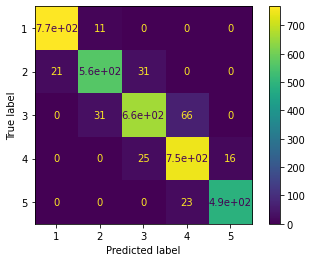

In [79]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test)

In [80]:
print(y_pred_lr)
print(confusion_matrix(y_pred_lr, y_test))

[3 3 3 ... 2 4 2]
[[767  21   0   0   0]
 [ 11 564  31   0   0]
 [  0  31 660  25   0]
 [  0   0  66 747  23]
 [  0   0   0  16 491]]


In [81]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [82]:
### Logisticka regresija

params = [{'C':[0.001],'penalty':['none','l2']}] 

logreg = LogisticRegression(solver = 'newton-cg')

grid = GridSearchCV(logreg, params, cv=3, scoring='f1_weighted')
grid.fit(X_train,y_train)

print('Najbolje vrednosti parametra: ', grid.best_params_)
print(grid.cv_results_['mean_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Sett

Najbolje vrednosti parametra:  {'C': 0.001, 'penalty': 'none'}
[0.96850101 0.30758546]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [83]:
grid_test = grid.predict(X_test)
grid_test_proba = grid.predict_proba(X_test)

acc_lr_test = accuracy_score(y_test, grid_test)
prec_lr_test = precision_score(y_test, grid_test, average='weighted')
recall_lr_test = recall_score(y_test, grid_test, average='weighted')

print('ACC: {} \nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9771213437590501 
Precision: 0.9772032343304604
Recall: 0.9771213437590501


In [84]:
### KNN
parameters = {'n_neighbors': [3,5,7,9,11,13,15], 'metric': ['euclidean', 'manhattan','chebyshev']}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, parameters, cv=5, scoring='f1_weighted')
grid.fit(X_train,y_train)

print('Najbolje vrednosti parametra: ', grid.best_params_)

Najbolje vrednosti parametra:  {'metric': 'manhattan', 'n_neighbors': 15}


In [85]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [86]:
mutual_info_classif(X_train,y_train)

array([6.95188431e-03, 2.56842159e-03, 4.11712383e-03, 4.27774681e-03,
       5.62413514e-03, 9.84229465e-03, 1.90130745e-01, 5.73579855e-02,
       4.01262499e-01, 4.72242813e-01, 6.03325042e-01, 4.06903742e-01,
       1.11087077e-01, 3.50512619e-01, 3.51950182e-02, 2.17106489e-02,
       1.22547657e-03, 4.71656689e-03, 1.08586323e-02, 1.07636815e-02,
       0.00000000e+00, 0.00000000e+00, 3.61835106e-02, 9.82486314e-02,
       1.27521367e-02, 0.00000000e+00, 3.57133589e-03, 6.11226598e-02,
       1.22167035e-02, 0.00000000e+00, 0.00000000e+00, 4.70604431e-04,
       7.51387237e-03, 0.00000000e+00, 0.00000000e+00, 1.71743034e-03,
       9.17630648e-02, 2.30766043e-02, 2.02758857e-01, 9.78321344e-02,
       1.19140341e-02, 4.64997780e-03, 5.98526628e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.43697024e-04, 7.55215714e-03,
       8.05206710e-03, 1.55182241e-02, 9.91098699e-02, 3.86984802e-02,
       2.03574803e-01, 1.09926584e-02, 3.83434793e-02, 5.01477840e-02,
      

In [87]:
best = SelectKBest(k=15, score_func=mutual_info_classif)

In [88]:
best.fit(X_train,y_train)
best.scores_

array([1.21947416e-03, 0.00000000e+00, 7.94630267e-04, 3.47292832e-03,
       6.97380178e-03, 9.24553206e-03, 2.01994307e-01, 4.81125271e-02,
       4.08041947e-01, 4.71450748e-01, 6.14209856e-01, 4.03394617e-01,
       1.11359553e-01, 3.46434550e-01, 4.24021424e-02, 1.89854596e-02,
       4.17873601e-03, 9.83717375e-03, 1.08879339e-02, 2.65551433e-03,
       1.11010284e-02, 0.00000000e+00, 3.36552066e-02, 1.08696013e-01,
       0.00000000e+00, 1.11895766e-02, 5.34100319e-03, 6.55558034e-02,
       2.39197177e-02, 0.00000000e+00, 0.00000000e+00, 1.00016995e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96344612e-03,
       8.81234633e-02, 1.77700682e-02, 2.00536348e-01, 8.98704679e-02,
       0.00000000e+00, 2.12719193e-03, 5.86088675e-04, 0.00000000e+00,
       0.00000000e+00, 3.14550237e-03, 1.15578105e-03, 1.11564153e-04,
       5.56771276e-04, 2.35812764e-02, 9.07574131e-02, 4.31492536e-02,
       1.86467840e-01, 1.09492406e-02, 3.83348170e-02, 4.84189700e-02,
      

In [89]:
best.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False])

In [90]:
X_reduced_train = pd.DataFrame(best.transform(X_train), columns=X_train[0,best.get_support()])

In [91]:
X_reduced_test = pd.DataFrame(best.transform(X_test), columns=X_test[0,best.get_support()])

In [92]:
parameters = {'n_neighbors': [15], 'metric': ['manhattan']}
grid = GridSearchCV(knn, parameters, cv=5, scoring='f1_weighted')
grid.fit(X_reduced_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['manhattan'], 'n_neighbors': [15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [95]:
grid_test = grid.predict(X_reduced_test)
grid_test_proba = grid.predict_proba(X_reduced_test)

acc_lr_test = accuracy_score(y_test, grid_test)
prec_lr_test = precision_score(y_test, grid_test, average='weighted')
recall_lr_test = recall_score(y_test, grid_test, average='weighted')

print('ACC: {} \nPrecision: {}\nRecall: {}'.format(acc_lr_test, prec_lr_test, recall_lr_test))

ACC: 0.9490298291340863 
Precision: 0.94925179971698
Recall: 0.9490298291340863


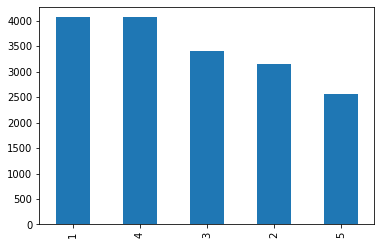

In [94]:
data['Rounded Position'].value_counts().plot(kind='bar')